In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #import the module to perform standardization
from sklearn.decomposition import PCA #import the module to perform Principal Component Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #import package to perform Logistic Regression
from sklearn.ensemble import RandomForestClassifier #import package to perform Random Forest
from sklearn.ensemble import GradientBoostingClassifier #import package to perform Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier #import package to perform k-NN classifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

In [2]:
preprocessed_train_set = pd.read_csv('data/preprocessed_train_set.csv', sep=';')
train_target = pd.read_csv('data/train_target.csv', sep=';')

preprocessed_test_set = pd.read_csv('data/preprocessed_test_set.csv', sep=';')
test_target = pd.read_csv('data/test_target.csv', sep=';')

preprocessed_entire_set = pd.read_csv('data/preprocessed_entire_set.csv', sep=';')
entire_target = pd.read_csv('data/entire_target.csv', sep=';')

In [3]:
%time
classifier_ls = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boosting', 'K_NN']
classifier_dc = {
    'Logistic_Regression': LogisticRegression(
        class_weight='balanced',
        solver='lbfgs',
        max_iter= 10000),
    
    'Random_Forest': RandomForestClassifier(
        n_estimators=50, 
        class_weight='balanced'),
    
    'Gradient_Boosting': GradientBoostingClassifier(
        max_depth=5),
    
    'K_NN': KNeighborsClassifier(
        n_neighbors=5, 
        weights='distance')
    
}

n_trials = 3
test_size_rt = 0.2

score_ls = []
for ic, (cl_name, Classifier) in enumerate(classifier_dc.items()):
    print (ic, cl_name)
    for trial in range(n_trials):  
        
    
        temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(
            preprocessed_entire_set, 
            entire_target, 
            test_size=0.2, 
            stratify = entire_target)
        Classifier.fit(temp_X_train, np.ravel(temp_y_train))
        pred_labels = Classifier.predict(temp_X_test)
        
        roc_auc =  roc_auc_score(temp_y_test, np.ravel(pred_labels))
        score_ls.append([cl_name, roc_auc, 'AUC'])
        
        precision = precision_score(temp_y_test, np.ravel(pred_labels), average='binary')
        score_ls.append([cl_name, precision, 'Precision'])
        
        recall = recall_score(temp_y_test, np.ravel(pred_labels), average='binary')
        score_ls.append([cl_name, recall,'Recall'])
        
        F1 = f1_score(temp_y_test, np.ravel(pred_labels), average='binary')
        score_ls.append([cl_name, F1,'f1 Score'])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
0 Logistic_Regression
1 Random_Forest
2 Gradient_Boosting
3 K_NN


In [4]:
booster = XGBClassifier(
    eta = 0.01,
    base_score=0.5,
    n_estimators=4000,
    n_jobs=-1,
    nthread=None,
    objective = 'binary:logistic',
    eval_metric ='auc')

In [5]:
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(
            preprocessed_entire_set, 
            entire_target, 
            test_size=0.2, 
            stratify = entire_target)

In [ ]:
booster.fit(temp_X_train, np.ravel(temp_y_train))

In [ ]:
pred_labels = booster.predict(temp_X_test)

In [ ]:
roc_auc =  roc_auc_score(temp_y_test, np.ravel(pred_labels))

In [ ]:
roc_auc

In [7]:
metrics_df = pd.DataFrame(score_ls, columns=['Classifier','Score','Score_type'])

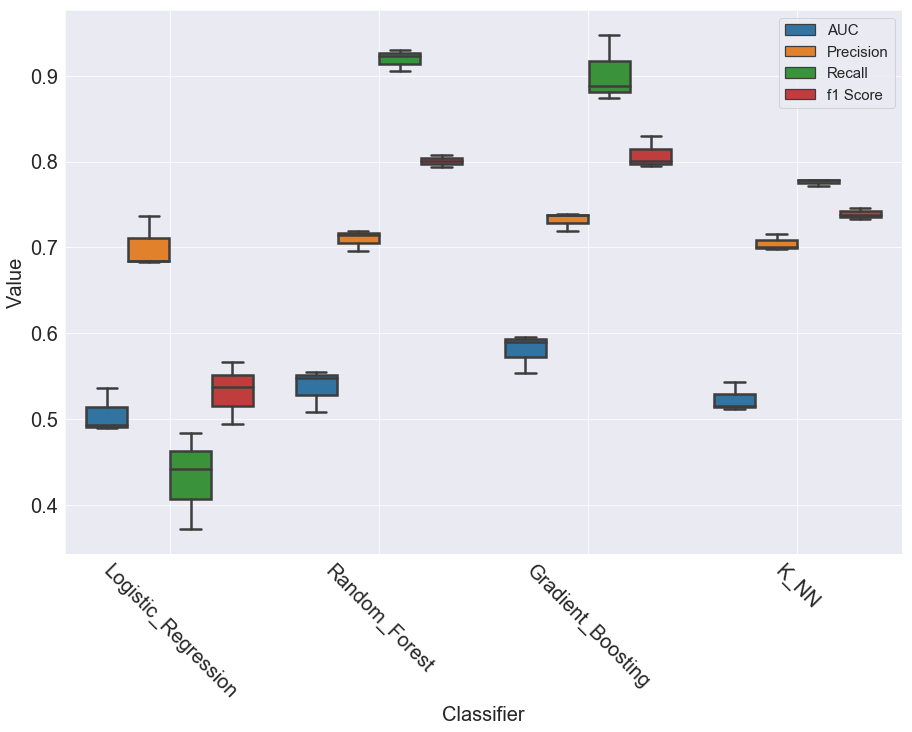

In [8]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Classifier", y="Score", hue="Score_type", data=metrics_df, linewidth=2.5) #producing the boxplot
ax.set_xlabel("Classifier",fontsize=20)
ax.set_ylabel("Value",fontsize=20)
plt.tick_params(labelsize=20)
plt.xticks(rotation= -45)
plt.legend(fontsize=(15))
plt.grid(True)